# Part 1: NY Taxi Fare Prediction

In [167]:
# !?pip install -q kaggle

In [168]:
# from google.colab import files
# files.upload()

In [169]:
# !mkdir ~/.Paggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [170]:
# !kaggle competitions download -c new-york-city-taxi-fare-prediction 

In [171]:
# !unzip new-york-city-taxi-fare-prediction

In [125]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [126]:
train = pd.read_csv("train.csv", nrows = 1000000)
test = pd.read_csv("test.csv")

In [127]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


**Added haversine_distance column because i have to data cleaning on the basis of distance per kilometer**

In [128]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [129]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

PART 1 --> train CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





**Droping column whose passenger count are less then zero**

In [130]:
# index=[]
# for i in train:
#     index.append(i)

In [131]:
train=train[train['passenger_count']>=0]

In [132]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 9)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'H_Distance']


In [133]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
 8   H_Distance         999990 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 76.3+ MB


**Checking for null values in test and training data**

In [134]:
#check for missing values in train data
#missing_value=["N/a","na",np.nan]
#train = train.read_csv("content/train.csv",na_values=missing_value)
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
H_Distance           10
dtype: int64

In [135]:
# check for missing value in test data
test.isnull().sum(axis=0)

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
H_Distance           0
dtype: int64

In [136]:
#drop the missing values
#train = train["fare_amount"]>=0
train = train.dropna()

In [137]:
# check target value
train["fare_amount"]
len(train)

999990

In [138]:
train.isnull().sum(axis=0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
H_Distance           0
dtype: int64

In [139]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


**Checking the fare_amount_criteria**

In [140]:
#Look for no. of non-positive fare_amount values.
(train["fare_amount"]<=0).sum()

67

In [141]:
# Remove the non-positive fare_amount values.
train = train[train["fare_amount"]>0]


In [142]:
(train["fare_amount"]<=0).sum()

0

**Below this i was calculating manhattan_distance but further it's graph with fare amount per passanger was wrong**


In [143]:
# l1, l2 = abs(train["pickup_longitude"] - train["dropoff_longitude"]), abs(train["pickup_latitude"] - train["dropoff_latitude"])
# manhattan_dist = l1 + l2

**Added a column name fare_by_H_distance for removing outliners**<br>
**Rupess Per Kilometer**

In [144]:
fare_by_H_distance=[]
fare_by_H_distance = train["fare_amount"]/train['H_Distance']
train['fare_by_H_distance']=fare_by_H_distance
# len(train)

**Added a column name effective_dist_by_fare which is fare per (distance*passenger  for removing outliners**

In [145]:
effective_dist_by_fare =  train["fare_amount"]/(train['H_Distance'] * train["passenger_count"])
len(effective_dist_by_fare)
train['effective_dist_by_fare']=effective_dist_by_fare

## Removing Outliers

**Criteria was that.....Before this drop, we have some inf and NA value after repeating multiple time came to this conclusion**

In [146]:
train = train[train['effective_dist_by_fare']>=.2]
train = train[train['effective_dist_by_fare']<=7]

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='effective_dist_by_fare'>

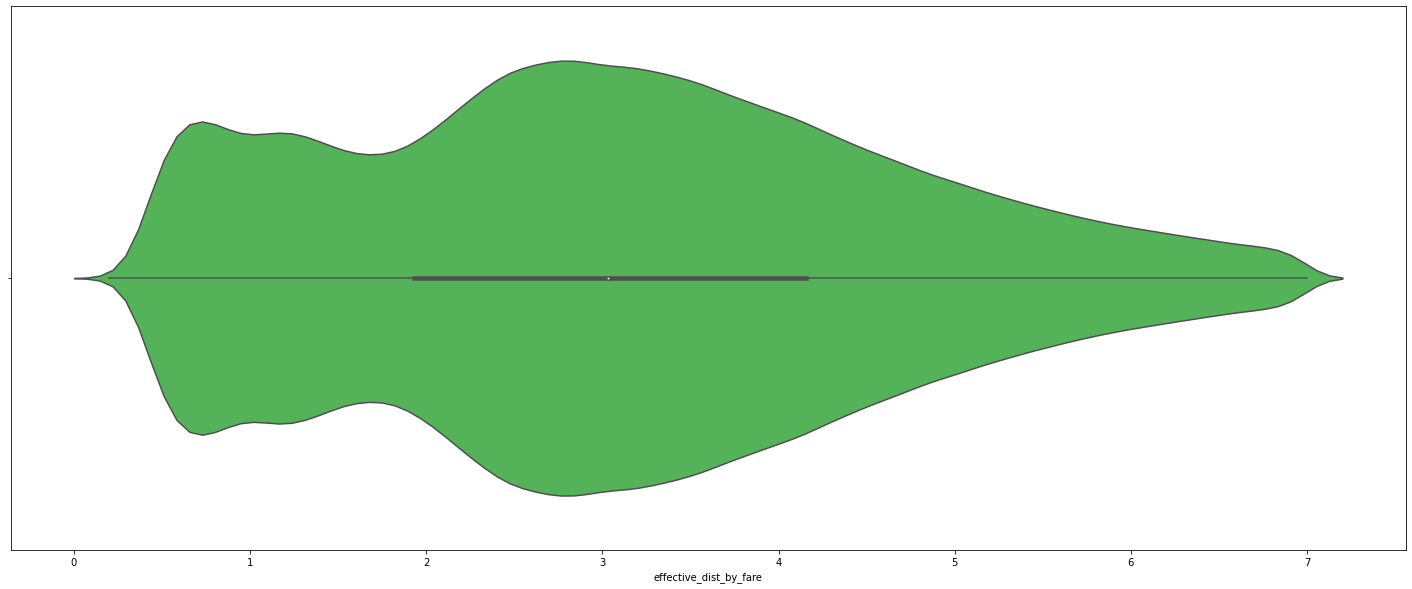

In [147]:
plt.figure(figsize=(25,10))
sns.violinplot(train["effective_dist_by_fare"], color='#44C34A')

In [148]:
len(train)

900721

In [149]:
train.describe().columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'fare_by_H_distance', 'effective_dist_by_fare'],
      dtype='object')

### DATA VISUALISATION

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

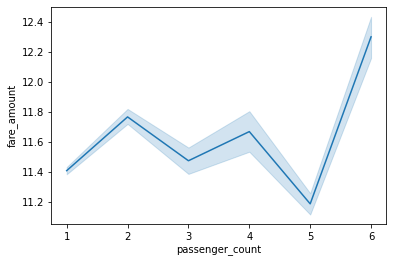

In [150]:
sns.lineplot( train['passenger_count'], train['fare_amount'],data=train)

<AxesSubplot:xlabel='fare_amount', ylabel='H_Distance'>

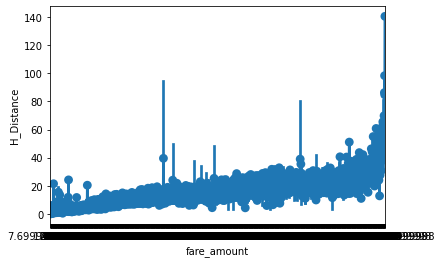

In [151]:
sns.pointplot(x = train["fare_amount"], y = train["H_Distance"], data = train)

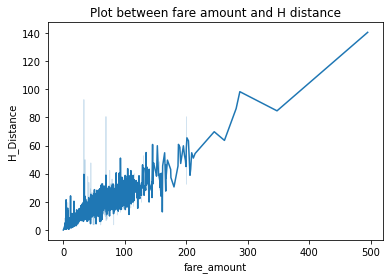

In [152]:
sns.lineplot(x="fare_amount", y="H_Distance", data=train) 
plt.title('Plot between fare amount and H distance')
plt.show()

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_by_H_distance', ylabel='passenger_count'>

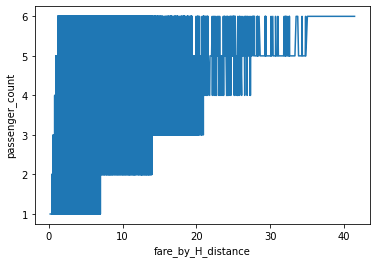

In [153]:
sns.lineplot(train['fare_by_H_distance'],train['passenger_count'])

In [154]:
# sns.lineplot(train['fare_amount'],train['pass'])

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

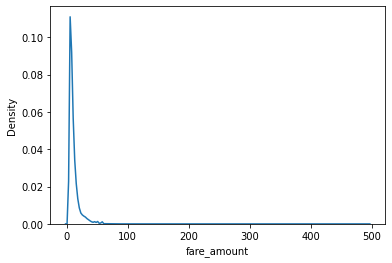

In [155]:
sns.kdeplot(train["fare_amount"])

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


Check the data types of each column

In [156]:
train.dtypes

key                        object
fare_amount               float64
pickup_datetime            object
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
passenger_count             int64
H_Distance                float64
fare_by_H_distance        float64
effective_dist_by_fare    float64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [157]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [158]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [159]:
#check the dtypes after conversion
train.dtypes

key                            datetime64[ns]
fare_amount                           float64
pickup_datetime           datetime64[ns, UTC]
pickup_longitude                      float64
pickup_latitude                       float64
dropoff_longitude                     float64
dropoff_latitude                      float64
passenger_count                         int64
H_Distance                            float64
fare_by_H_distance                    float64
effective_dist_by_fare                float64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [160]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [161]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [162]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

<center><B>Correlation</center>

In [163]:
# print(data.corr())

# Part B Scaling and standardization

In [164]:
import sklearn
from sklearn.preprocessing import StandardScaler

### Standard Scaling

In [170]:

scaler_object = StandardScaler()
scale=train
for i in train:
    # print(i)
    if(i!='key' or i!='pickup_longitude' or i!='pickup_latitude' or i!='dropoff_longitude' or i!='dropoff_latitude'):
        scale[i]=scaler_object.fit_transform(train[[i]])

In [171]:
# scale['key']

<AxesSubplot:>

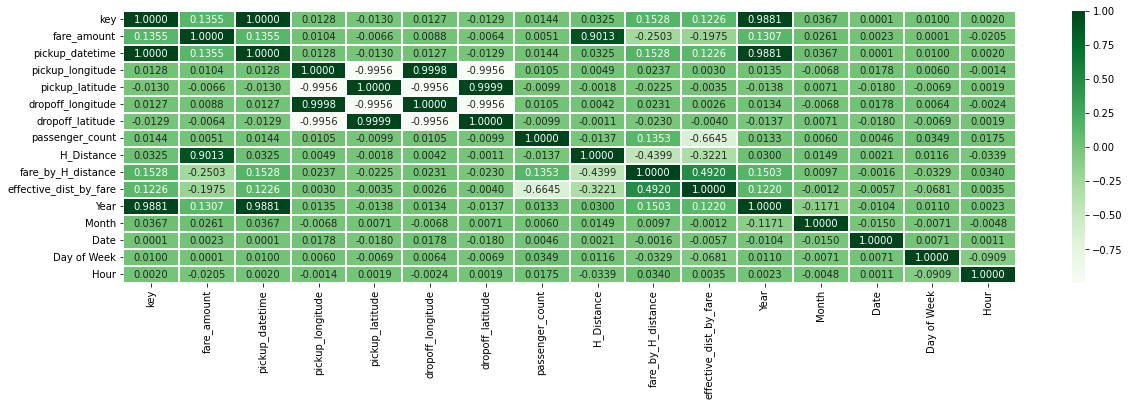

In [172]:
data_p = pd.DataFrame(train)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(data_p.corr(),annot=True,cmap="Greens",fmt='.4f',linewidths=2)

In [173]:
data=train

In [174]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [121]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# Part A

In [175]:
featuresScaler = StandardScaler()
targetScaler = StandardScaler()
train_data = featuresScaler.fit_transform(data.iloc[:, data.columns!='fare_amount'].values)
test_data = targetScaler.fit_transform(data[['fare_amount']].values)

In [176]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_data, test_data, test_size=0.33, random_state=42)

In [80]:
input_size = train_x.shape[-1]
act_f = 'sigmoid'
optimizer = 'relu'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=10
lr = 1e-4


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f))
model.add(tf.keras.layers.Dense(8, activation=act_f))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=30, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)


history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_x, test_y)
    # ,callbacks=[early_stopping]
    )


print('Valiation mean_absolute_error on the last epoch was', history.history['val_loss'][-1],'\n\n')
    

for i in np.random.choice(range(len(test_x)),size=10):
    print(f"Actual Value -> {test_y[i]}\tPredicted Value -> {model.predict(test_x[i:i+1])}")

Epoch 1/10
4715/4715 [==============================] - 8s 2ms/step - loss: 0.4666 - val_loss: 0.3067
Epoch 2/10
4715/4715 [==============================] - 12s 3ms/step - loss: 0.2209 - val_loss: 0.1992
Epoch 3/10
4715/4715 [==============================] - 25s 5ms/step - loss: 0.1920 - val_loss: 0.1832
Epoch 4/10
4715/4715 [==============================] - 18s 4ms/step - loss: 0.1734 - val_loss: 0.1597
Epoch 5/10
4715/4715 [==============================] - 18s 4ms/step - loss: 0.1358 - val_loss: 0.1021
Epoch 6/10
4715/4715 [==============================] - 13s 3ms/step - loss: 0.0767 - val_loss: 0.0632
Epoch 7/10
4715/4715 [==============================] - 15s 3ms/step - loss: 0.0580 - val_loss: 0.0530
Epoch 8/10
4715/4715 [==============================] - 13s 3ms/step - loss: 0.0494 - val_loss: 0.0456
Epoch 9/10
4715/4715 [==============================] - 15s 3ms/step - loss: 0.0432 - val_loss: 0.0405
Epoch 10/10
4715/4715 [==============================] - 15s 3ms/step - lo

In [81]:
actual_y = targetScaler.inverse_transform(test_y)
predicted_y = targetScaler.inverse_transform(model.predict(test_x))

print("MAE:", mean_absolute_error(predicted_y, actual_y))
print("MAPE:", mean_absolute_percentage_error(predicted_y, actual_y))
print("MSE:", mean_squared_error(predicted_y, actual_y))

9289/9289 [==============================] - 14s 1ms/step
MAE: 0.03672591069506646
MAPE: 0.3909793935146316
MSE: 0.03529857370115632


# Part B

In [90]:
loss_list = {
    'mean': [],
    'mae': []
}

In [91]:
input_size = train_x.shape[-1]
act_f = 'sigmoid'
optimizer = 'Adam'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=100
lr = 1e-4


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(32, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(12, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=100, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y)
    )


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
loss_list['mean'] += [history.history['val_loss'][-1]]
for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

loss_list['mae'] += [model.predict(train_x)-train_y]

Valiation mean_absolute_error on the last epoch was 0.012904544360935688 


1/1 [==============================] - 0s 123ms/step
Actual Value -> [-0.56724297]	Predicted Value -> [[-0.5749038]]
1/1 [==============================] - 0s 25ms/step
Actual Value -> [1.53196454]	Predicted Value -> [[1.5166584]]
1/1 [==============================] - 0s 26ms/step
Actual Value -> [0.02348879]	Predicted Value -> [[0.02977899]]
1/1 [==============================] - 0s 27ms/step
Actual Value -> [-0.22968196]	Predicted Value -> [[-0.23134199]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [-0.10309659]	Predicted Value -> [[-0.10509601]]
1/1 [==============================] - 0s 26ms/step
Actual Value -> [-0.56724297]	Predicted Value -> [[-0.5658519]]
1/1 [==============================] - 0s 24ms/step
Actual Value -> [-0.73602347]	Predicted Value -> [[-0.7418154]]
1/1 [==============================] - 0s 20ms/step
Actual Value -> [-0.31407222]	Predicted Value -> [[-0.314101

In [92]:
actual_y = targetScaler.inverse_transform(test_y)
predicted_y = targetScaler.inverse_transform(model.predict(test_x))

print("MAE:", mean_absolute_error(predicted_y, actual_y))
print("MAPE:", mean_absolute_percentage_error(predicted_y, actual_y))
print("MSE:", mean_squared_error(predicted_y, actual_y))

9289/9289 [==============================] - 11s 1ms/step
MAE: 0.012904562138735096
MAPE: 0.14976844640865583
MSE: 0.020480338292138075


In [96]:
input_size = train_x.shape[-1]
act_f = 'sigmoid'
optimizer = 'Adam'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=100
lr = 1e-4


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(32, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(256, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(256, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(12, activation=act_f, bias_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)



history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y)
    # ,callbacks=[early_stopping]
    )


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
loss_list['mean'] += [history.history['val_loss'][-1]]
for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

loss_list['mae'] += [model.predict(train_x)-train_y]

Valiation mean_absolute_error on the last epoch was 0.009090378880500793 


1/1 [==============================] - 0s 196ms/step
Actual Value -> [-0.44065759]	Predicted Value -> [[-0.44025618]]
1/1 [==============================] - 0s 32ms/step
Actual Value -> [0.21336686]	Predicted Value -> [[0.21844551]]
1/1 [==============================] - 0s 31ms/step
Actual Value -> [-0.14529171]	Predicted Value -> [[-0.1447826]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [-0.10309659]	Predicted Value -> [[-0.103441]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [-0.39846247]	Predicted Value -> [[-0.3969453]]
1/1 [==============================] - 0s 34ms/step
Actual Value -> [-0.73602347]	Predicted Value -> [[-0.73146075]]
1/1 [==============================] - 0s 31ms/step
Actual Value -> [-0.52504784]	Predicted Value -> [[-0.52267617]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [-0.6094381]	Predicted Value -> [[-0.60646

In [97]:
actual_y = targetScaler.inverse_transform(test_y)
predicted_y = targetScaler.inverse_transform(model.predict(test_x))

print("MAE:", mean_absolute_error(predicted_y, actual_y))
print("MAPE:", mean_absolute_percentage_error(predicted_y, actual_y))
print("MSE:", mean_squared_error(predicted_y, actual_y))

9289/9289 [==============================] - 18s 2ms/step
MAE: 0.009090366470000402
MAPE: 0.050728122753325104
MSE: 0.018292229738955494


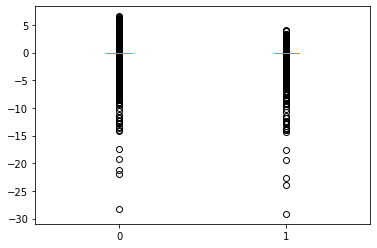

In [98]:
n = len(loss_list['mae'])
for i in range(n):
    loss_list['mae'][i] = loss_list['mae'][i].reshape((len(loss_list['mae'][i]),))
# plt.plot(loss_list['mean'],c='b')
plt.boxplot(loss_list['mae'],positions=[*range(n)])
plt.show()

# Part C

In [99]:
input_size = train_x.shape[-1]
act_f = 'tanh'
optimizer = 'Adam'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=50
lr = 1e-4


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f))
model.add(tf.keras.layers.Dense(8, activation=act_f))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_x, test_y)
    )


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1],'\n\n')
    

for i in np.random.choice(range(len(test_x)),size=10):
    print(f"Actual Value -> {test_y[i]}\tPredicted Value -> {model.predict(test_x[i:i+1])}")

Epoch 1/10
4715/4715 [==============================] - 8s 2ms/step - loss: 0.2615 - val_loss: 0.1806
Epoch 2/10
4715/4715 [==============================] - 8s 2ms/step - loss: 0.1217 - val_loss: 0.0781
Epoch 3/10
4715/4715 [==============================] - 8s 2ms/step - loss: 0.0635 - val_loss: 0.0522
Epoch 4/10
4715/4715 [==============================] - 9s 2ms/step - loss: 0.0453 - val_loss: 0.0391
Epoch 5/10
4715/4715 [==============================] - 8s 2ms/step - loss: 0.0346 - val_loss: 0.0307
Epoch 6/10
4715/4715 [==============================] - 11s 2ms/step - loss: 0.0280 - val_loss: 0.0254
Epoch 7/10
4715/4715 [==============================] - 9s 2ms/step - loss: 0.0240 - val_loss: 0.0222
Epoch 8/10
4715/4715 [==============================] - 9s 2ms/step - loss: 0.0212 - val_loss: 0.0200
Epoch 9/10
4715/4715 [==============================] - 9s 2ms/step - loss: 0.0191 - val_loss: 0.0181
Epoch 10/10
4715/4715 [==============================] - 14s 3ms/step - loss: 0.0

In [100]:
print("MAE:", mean_absolute_error(model.predict(test_x), test_y))
print("MAPE:", mean_absolute_percentage_error(model.predict(test_x), test_y))
print("MSE:", mean_squared_error(model.predict(test_x), test_y))

9289/9289 [==============================] - 17s 2ms/step
MAE: 0.01663736597309669
9289/9289 [==============================] - 18s 2ms/step
MAPE: 0.13413925146509573
9289/9289 [==============================] - 9s 991us/step
MSE: 0.02673613791647399


In [101]:
input_size = train_x.shape[-1]
act_f = 'relu'
optimizer = 'Adam'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=100
lr = 1e-4


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f))
model.add(tf.keras.layers.Dense(32, activation=act_f))
model.add(tf.keras.layers.Dense(64, activation=act_f))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dense(64, activation=act_f))
model.add(tf.keras.layers.Dense(12, activation=act_f))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y)
    ,callbacks=[early_stopping])


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
    

for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

Valiation mean_absolute_error on the last epoch was 0.002651244169101119 


1/1 [==============================] - 0s 129ms/step
Actual Value -> [-0.48285272]	Predicted Value -> [[-0.48223633]]
1/1 [==============================] - 0s 25ms/step
Actual Value -> [-0.86260885]	Predicted Value -> [[-0.86645997]]
1/1 [==============================] - 0s 25ms/step
Actual Value -> [-0.47230394]	Predicted Value -> [[-0.47204056]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [-0.27187709]	Predicted Value -> [[-0.27138698]]
1/1 [==============================] - 0s 32ms/step
Actual Value -> [0.10787904]	Predicted Value -> [[0.10952689]]
1/1 [==============================] - 0s 32ms/step
Actual Value -> [-0.57779175]	Predicted Value -> [[-0.5761186]]
1/1 [==============================] - 0s 33ms/step
Actual Value -> [-0.56724297]	Predicted Value -> [[-0.5651634]]
1/1 [==============================] - 0s 16ms/step
Actual Value -> [-0.26132831]	Predicted Value -> [[-0.25

In [102]:
print("MAE:", mean_absolute_error(model.predict(test_x), test_y))
print("MAPE:", mean_absolute_percentage_error(model.predict(test_x), test_y))
print("MSE:", mean_squared_error(model.predict(test_x), test_y))

9289/9289 [==============================] - 10s 1ms/step
MAE: 0.0026512473229887133
9289/9289 [==============================] - 10s 1ms/step
MAPE: 0.02056775977634667
9289/9289 [==============================] - 9s 997us/step
MSE: 0.0010359090913125328


# Part D

In [107]:
input_size = train_x.shape[-1]
act_f = 'sigmoid'
optimizer = 'Adam'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=1000
lr = 1e-4
dropout_rate = 0.7


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f))
model.add(tf.keras.layers.Dense(32, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(64, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(64, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(12, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=100, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y),
    callbacks=[early_stopping])


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
    

for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

Valiation mean_absolute_error on the last epoch was 0.5646597743034363 


1/1 [==============================] - 0s 310ms/step
Actual Value -> [0.19226929]	Predicted Value -> [[-0.31396967]]
1/1 [==============================] - 0s 37ms/step
Actual Value -> [0.5298303]	Predicted Value -> [[-0.31396967]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [1.62690357]	Predicted Value -> [[-0.31396967]]
1/1 [==============================] - 0s 33ms/step
Actual Value -> [-0.65163322]	Predicted Value -> [[-0.31396967]]
1/1 [==============================] - 0s 23ms/step
Actual Value -> [-0.52504784]	Predicted Value -> [[-0.31396967]]
1/1 [==============================] - 0s 23ms/step
Actual Value -> [-0.65163322]	Predicted Value -> [[-0.31396967]]
1/1 [==============================] - 0s 30ms/step
Actual Value -> [-0.57779175]	Predicted Value -> [[-0.31396967]]
1/1 [==============================] - 0s 33ms/step
Actual Value -> [-0.6094381]	Predicted Value -> [[-0.31396

In [108]:
print("MAE:", mean_absolute_error(model.predict(test_x), test_y))
print("MAPE:", mean_absolute_percentage_error(model.predict(test_x), test_y))
print("MSE:", mean_squared_error(model.predict(test_x), test_y))

9289/9289 [==============================] - 16s 2ms/step
MAE: 0.5646600679097683
9289/9289 [==============================] - 15s 2ms/step
MAPE: 1.7984541780906045
9289/9289 [==============================] - 16s 2ms/step
MSE: 1.0956918168059262


In [109]:
input_size = train_x.shape[-1]
act_f = 'relu'
optimizer = 'Adam'
loss_type = 'mean_absolute_error'
batch_size=16
epochs=1000
lr = 1e-4
dropout_rate = 0.4


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f))
model.add(tf.keras.layers.Dense(32, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(64, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(128, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(64, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(12, activation=act_f))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=100, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y),
    callbacks=[early_stopping])


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
    

for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

Valiation mean_absolute_error on the last epoch was 0.7488912343978882 


1/1 [==============================] - 0s 298ms/step
Actual Value -> [-0.14529171]	Predicted Value -> [[0.5831807]]
1/1 [==============================] - 0s 14ms/step
Actual Value -> [-0.73602347]	Predicted Value -> [[-0.29554918]]
1/1 [==============================] - 0s 30ms/step
Actual Value -> [0.74080593]	Predicted Value -> [[2.422829]]
1/1 [==============================] - 0s 43ms/step
Actual Value -> [-0.15584049]	Predicted Value -> [[0.6061202]]
1/1 [==============================] - 0s 34ms/step
Actual Value -> [0.15007417]	Predicted Value -> [[1.4809809]]
1/1 [==============================] - 0s 7ms/step
Actual Value -> [-0.14529171]	Predicted Value -> [[0.58430433]]
1/1 [==============================] - 0s 23ms/step
Actual Value -> [-0.18748684]	Predicted Value -> [[0.49912828]]
1/1 [==============================] - 0s 24ms/step
Actual Value -> [0.21336686]	Predicted Value -> [[1.7492588]]
1/1 [=

In [110]:
print("MAE:", mean_absolute_error(model.predict(test_x), test_y))
print("MAPE:", mean_absolute_percentage_error(model.predict(test_x), test_y))
print("MSE:", mean_squared_error(model.predict(test_x), test_y))

9289/9289 [==============================] - 13s 1ms/step
MAE: 0.748888122612038
9289/9289 [==============================] - 12s 1ms/step
MAPE: 4.3712706971186766
9289/9289 [==============================] - 12s 1ms/step
MSE: 0.8370755720323513


# Part E

In [112]:
input_size = train_x.shape[-1]
act_f = 'relu'
optimizer = 'SGD'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=100
lr = 1e-4


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(32, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(12, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y))


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
    

for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

Valiation mean_absolute_error on the last epoch was 0.0029116070363670588 


1/1 [==============================] - 0s 229ms/step
Actual Value -> [-0.10309659]	Predicted Value -> [[-0.10494988]]
1/1 [==============================] - 0s 24ms/step
Actual Value -> [-0.10309659]	Predicted Value -> [[-0.10255156]]
1/1 [==============================] - 0s 26ms/step
Actual Value -> [-0.82041372]	Predicted Value -> [[-0.8214184]]
1/1 [==============================] - 0s 34ms/step
Actual Value -> [0.84629374]	Predicted Value -> [[0.8473666]]
1/1 [==============================] - 0s 25ms/step
Actual Value -> [0.23446442]	Predicted Value -> [[0.23035127]]
1/1 [==============================] - 0s 37ms/step
Actual Value -> [-0.52504784]	Predicted Value -> [[-0.52373075]]
1/1 [==============================] - 0s 23ms/step
Actual Value -> [0.3610498]	Predicted Value -> [[0.35595208]]
1/1 [==============================] - 0s 36ms/step
Actual Value -> [-0.63053566]	Predicted Value -> [[-0.628221

In [113]:
print("MAE:", mean_absolute_error(model.predict(test_x), test_y))
print("MAPE:", mean_absolute_percentage_error(model.predict(test_x), test_y))
print("MSE:", mean_squared_error(model.predict(test_x), test_y))

9289/9289 [==============================] - 17s 2ms/step
MAE: 0.002911606756869635
9289/9289 [==============================] - 13s 1ms/step
MAPE: 0.05692143509269726
9289/9289 [==============================] - 22s 2ms/step
MSE: 0.00019290273083079942


In [114]:
input_size = train_x.shape[-1]
act_f = 'relu'
optimizer = 'Adagrad'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=100
lr = 1e-4


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(32, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(12, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(1)) 


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y))


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
    

for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

Valiation mean_absolute_error on the last epoch was 0.0031351931393146515 


1/1 [==============================] - 0s 94ms/step
Actual Value -> [4.01831232]	Predicted Value -> [[4.028695]]
1/1 [==============================] - 0s 16ms/step
Actual Value -> [-0.48285272]	Predicted Value -> [[-0.48051694]]
1/1 [==============================] - 0s 24ms/step
Actual Value -> [-0.56724297]	Predicted Value -> [[-0.5651275]]
1/1 [==============================] - 0s 34ms/step
Actual Value -> [-0.22968196]	Predicted Value -> [[-0.22543146]]
1/1 [==============================] - 0s 24ms/step
Actual Value -> [-0.52504784]	Predicted Value -> [[-0.52347714]]
1/1 [==============================] - 0s 32ms/step
Actual Value -> [-0.63053566]	Predicted Value -> [[-0.62923306]]
1/1 [==============================] - 0s 24ms/step
Actual Value -> [0.10787904]	Predicted Value -> [[0.10873603]]
1/1 [==============================] - 0s 25ms/step
Actual Value -> [-0.69382835]	Predicted Value -> [[-0.69252

In [118]:
print("MAE:", mean_absolute_error(model.predict(test_x), test_y))
print("MAPE:", mean_absolute_percentage_error(model.predict(test_x), test_y))
print("MSE:", mean_squared_error(model.predict(test_x), test_y))

9289/9289 [==============================] - 11s 1ms/step
MAE: 0.0037852819150251448
9289/9289 [==============================] - 11s 1ms/step
MAPE: 0.1346832710786799
9289/9289 [==============================] - 11s 1ms/step
MSE: 0.00034593819031988096


In [116]:
input_size = train_x.shape[-1]
act_f = 'relu'
optimizer = 'Adamax'
loss_type = 'mean_absolute_error'
batch_size=128
epochs=100
lr = 1e-4


'''
Defining Layers
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape=(input_size,), activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(32, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(128, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(64, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(12, activation=act_f, bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.Dense(1))


early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=1e-4, 
    mode='min'
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
loss=loss_type)

'''
Training Model
'''

history = model.fit(train_x, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_x, test_y))


print(f'Valiation {loss_type} on the last epoch was', history.history['val_loss'][-1], '\n\n')
    

for i in np.random.choice(range(len(train_x)),size=10):
    print(f"Actual Value -> {train_y[i]}\tPredicted Value -> {model.predict(train_x[i:i+1])}")

Valiation mean_absolute_error on the last epoch was 0.0037852744571864605 


1/1 [==============================] - 0s 234ms/step
Actual Value -> [-0.47230394]	Predicted Value -> [[-0.47391284]]
1/1 [==============================] - 0s 34ms/step
Actual Value -> [-0.65163322]	Predicted Value -> [[-0.6531476]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [-0.36681612]	Predicted Value -> [[-0.36975646]]
1/1 [==============================] - 0s 27ms/step
Actual Value -> [-0.01870634]	Predicted Value -> [[-0.01993728]]
1/1 [==============================] - 0s 29ms/step
Actual Value -> [1.07836693]	Predicted Value -> [[1.0760763]]
1/1 [==============================] - 0s 26ms/step
Actual Value -> [0.05513513]	Predicted Value -> [[0.05269372]]
1/1 [==============================] - 0s 34ms/step
Actual Value -> [-0.14529171]	Predicted Value -> [[-0.14341629]]
1/1 [==============================] - 0s 34ms/step
Actual Value -> [1.268245]	Predicted Value -> [[1.2562406

In [193]:
print("MAE:", mean_absolute_error(model.predict(test_x), test_y))
print("MAPE:", mean_absolute_percentage_error(model.predict(test_x), test_y))
print("MSE:", mean_squared_error(model.predict(test_x), test_y))

# Tabulate

In [89]:
import numpy as np
from sklearn.model_selection import KFold

In [194]:
splitter = KFold(n_splits=5, shuffle=True)
split_ed = splitter.split(test_x)
cvs1 = {'MSE':[], 'MAE': [], 'MAPE': []}
for train_i, test_i in split_ed:
    n_test_x, n_test_y = test_x[test_i], test_y[test_i]
    y=model.evaluate(n_test_x,n_test_y)
    cvs1['accuracy'].append(y[0])
    y_predict=model.predict(n_test_x)
    cvs1['MAE'].append( mean_absolute_error(model.predict(test_x), test_y))
    cvs1['MAPE'].append(mean_absolute_percentage_error(model.predict(test_x), test_y))
    cvs1['MSE'].append( mean_squared_error(model.predict(test_x), test_y))

In [185]:
from scipy import stats as st
f1_micro_interval = st.norm.interval(confidence=0.95, 
                 loc=np.mean(cvs1['MAE']),
                 scale=np.std(cvs1['MAE'])/10)
f1_mirco_interval = np.transpose(f1_micro_interval)

In [186]:
print(f1_micro_interval)

(nan, nan)


In [187]:
from scipy import stats as st
f1_micro_interval = st.norm.interval(confidence=0.95, 
                 loc=np.mean(cvs1['MAPE']),
                 scale=np.std(cvs1['MAPE'])/10)
f1_mirco_interval = np.transpose(f1_micro_interval)

In [188]:
print(f1_micro_interval)

(nan, nan)


In [189]:
from scipy import stats as st
f1_micro_interval = st.norm.interval(confidence=0.95, 
                 loc=np.mean(cvs1['MSE']),
                 scale=np.std(cvs1['MSE'])/10)
f1_mirco_interval = np.transpose(f1_micro_interval)

In [190]:
print(f1_micro_interval)

(nan, nan)


# Part 2

In [103]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import OneHotEncoder
import os
# from skimage import color

In [104]:
class_name = []
X_train=[]
Y_train=[]
for j in os.listdir("train"):
    class_name.append(j)
    # print(j)
    for k in os.listdir("train/"+j):
        if '.jpg' not in k:continue
        img=cv2.imread("train/"+j+"/"+k)
        # print(img)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img, (128,128))
            X_train.append(img)
            Y_train.append(j)
        except:pass

In [20]:
set(x.shape for x in X_train)

{(128, 128, 3)}

In [97]:
X_test=[]
Y_test=[]
for j in os.listdir("test"):
    for k in os.listdir("test/"+j):
        # try:
        img=cv2.imread("test/"+j+"/"+k)
        img=cv2.resize(img, (128,128))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X_test.append(gray)
        Y_test.append(j)
        # except:pass

In [98]:
X_test

[array([[123, 123, 123, ..., 159, 160, 161],
        [123, 123, 123, ..., 156, 157, 158],
        [123, 123, 123, ..., 125, 125, 126],
        ...,
        [128, 129, 129, ..., 131, 131, 131],
        [128, 128, 129, ..., 130, 130, 130],
        [128, 128, 128, ..., 129, 129, 129]], dtype=uint8),
 array([[142, 142, 142, ..., 139, 139, 139],
        [142, 142, 142, ..., 139, 139, 139],
        [142, 142, 142, ..., 139, 139, 139],
        ...,
        [152, 152, 152, ..., 155, 155, 155],
        [152, 152, 152, ..., 155, 155, 155],
        [152, 152, 152, ..., 155, 155, 155]], dtype=uint8),
 array([[247, 247, 246, ..., 155, 250, 247],
        [252, 252, 251, ..., 153, 249, 247],
        [157, 157, 155, ..., 151, 247, 246],
        ...,
        [155, 157,  27, ...,  57,  56,  55],
        [158, 160,  30, ..., 159, 163, 166],
        [160, 162,  32, ..., 160, 166, 169]], dtype=uint8),
 array([[186, 176, 165, ..., 254, 253, 253],
        [184, 175, 165, ..., 255, 255, 255],
        [181, 17

In [22]:
X_train=np.array(X_train)
oe = OneHotEncoder(sparse=False)
Y_train=oe.fit_transform([[x]for x in Y_train])
X_test=np.array(X_test)
Y_test=oe.transform([[x]for x in Y_test])

In [23]:
X_train= X_train/ 255
X_train 

array([[[[0.68235294, 0.43921569, 0.16470588],
         [0.68627451, 0.44313725, 0.16862745],
         [0.69019608, 0.44705882, 0.17254902],
         ...,
         [0.69803922, 0.46666667, 0.19607843],
         [0.70196078, 0.47058824, 0.2       ],
         [0.70196078, 0.47058824, 0.2       ]],

        [[0.68235294, 0.43921569, 0.16470588],
         [0.68627451, 0.44313725, 0.16862745],
         [0.69019608, 0.44705882, 0.17254902],
         ...,
         [0.69803922, 0.46666667, 0.19607843],
         [0.69803922, 0.46666667, 0.19607843],
         [0.69803922, 0.46666667, 0.19607843]],

        [[0.68627451, 0.44313725, 0.16862745],
         [0.69019608, 0.44705882, 0.17254902],
         [0.69019608, 0.44705882, 0.17254902],
         ...,
         [0.69803922, 0.4627451 , 0.20392157],
         [0.69803922, 0.4627451 , 0.20392157],
         [0.69803922, 0.4627451 , 0.20392157]],

        ...,

        [[0.56862745, 0.56862745, 0.56862745],
         [0.56078431, 0.56078431, 0.56078431]

# Part A

In [24]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation="sigmoid"))
model.add(tf.keras.layers.Dense(256,activation="sigmoid"))
model.add(tf.keras.layers.Dense(64,activation="sigmoid"))
model.add(tf.keras.layers.Dense(7,activation="softmax"))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])

In [26]:
set(x.shape for x in X_train)

{(128, 128, 3)}

In [27]:
model.fit(X_train,Y_train, epochs=100,  batch_size=128)

Epoch 1/100
24/24 [==============================] - 11s 201ms/step - loss: 2.1735 - accuracy: 0.1054
Epoch 2/100
24/24 [==============================] - 4s 187ms/step - loss: 1.9178 - accuracy: 0.2174
Epoch 3/100
24/24 [==============================] - 4s 184ms/step - loss: 1.8678 - accuracy: 0.2194
Epoch 4/100
24/24 [==============================] - 5s 192ms/step - loss: 1.8501 - accuracy: 0.2241
Epoch 5/100
24/24 [==============================] - 4s 177ms/step - loss: 1.8368 - accuracy: 0.3000
Epoch 6/100
24/24 [==============================] - 5s 196ms/step - loss: 1.8243 - accuracy: 0.2930
Epoch 7/100
24/24 [==============================] - 5s 214ms/step - loss: 1.8116 - accuracy: 0.3344
Epoch 8/100
24/24 [==============================] - 6s 242ms/step - loss: 1.7987 - accuracy: 0.3530
Epoch 9/100
24/24 [==============================] - 7s 307ms/step - loss: 1.7854 - accuracy: 0.3633
Epoch 10/100
24/24 [==============================] - 7s 303ms/step - loss: 1.7718 - accur

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix([
    class_name[np.argmax(x)]for x in Y_test], 
    [class_name[np.argmax(x)]for x in model.predict(X_test)])

24/24 [==============================] - 1s 39ms/step


array([[  8,   7,  85,   0,   0,   0,   1],
       [  7,  55,   8,   0,   1,   0,   0],
       [  0,   0, 131,   0,   1,   1,   1],
       [  2,   3,  16,   0,   5,  10,  25],
       [  1,   3,   5,   0, 122,   7,   3],
       [  0,   0,   2,   0,   0,  73,   0],
       [  4,   9,  29,   2,   3,  13, 103]], dtype=int64)

In [29]:
model.predict(X_test)

24/24 [==============================] - 1s 33ms/step


array([[0.20435087, 0.03609716, 0.7208999 , ..., 0.00176814, 0.0205512 ,
        0.00753435],
       [0.22899704, 0.04555402, 0.69121444, ..., 0.0014036 , 0.01583382,
        0.00885039],
       [0.1913865 , 0.0552324 , 0.73124343, ..., 0.00106377, 0.0056396 ,
        0.00696048],
       ...,
       [0.18491235, 0.03847986, 0.64113814, ..., 0.00179548, 0.02630521,
        0.08034767],
       [0.03399207, 0.00734975, 0.02120316, ..., 0.0110699 , 0.0395267 ,
        0.8018239 ],
       [0.00756359, 0.00475042, 0.00112185, ..., 0.19378723, 0.02253256,
        0.63754016]], dtype=float32)

In [30]:
from sklearn.metrics import f1_score
y_redict=model.predict(X_test)
y_p=[]
y_a=[]
for (i,j) in zip(Y_test,y_redict):
    y_a.append(class_name[np.argmax(i)])
    y_p.append(class_name[np.argmax(j)])
print("f1_micro=",f1_score(y_a,y_p, average="micro"))
print("f1_macro=",f1_score(y_a,y_p, average="macro"))

24/24 [==============================] - 1s 30ms/step
f1_micro= 0.6595174262734584
f1_macro= 0.5596728903027932


# Part B

Experiment with number of layers and neurons per layer to increase the performance metrics. 

In [31]:
modelb=tf.keras.Sequential()
modelb.add(tf.keras.layers.Flatten())
modelb.add(tf.keras.layers.Dense(2048,activation="relu"))
modelb.add(tf.keras.layers.Dense(1024,activation="relu"))
modelb.add(tf.keras.layers.Dense(512,activation="relu"))
modelb.add(tf.keras.layers.Dense(256,activation="relu"))
modelb.add(tf.keras.layers.Dense(64,activation="relu"))
modelb.add(tf.keras.layers.Dense(7,activation="softmax"))

In [32]:
modelb.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [33]:
modelb.fit(X_train,Y_train, epochs=100)

Epoch 1/100
95/95 [==============================] - 50s 486ms/step - loss: 9.5250 - accuracy: 0.3934
Epoch 2/100
95/95 [==============================] - 42s 438ms/step - loss: 0.9664 - accuracy: 0.6642
Epoch 3/100
95/95 [==============================] - 44s 467ms/step - loss: 0.7450 - accuracy: 0.7488
Epoch 4/100
95/95 [==============================] - 42s 440ms/step - loss: 0.6504 - accuracy: 0.7786
Epoch 5/100
95/95 [==============================] - 46s 480ms/step - loss: 0.5623 - accuracy: 0.8094
Epoch 6/100
95/95 [==============================] - 42s 445ms/step - loss: 0.5607 - accuracy: 0.8104
Epoch 7/100
95/95 [==============================] - 43s 455ms/step - loss: 0.4838 - accuracy: 0.8343
Epoch 8/100
95/95 [==============================] - 41s 433ms/step - loss: 0.5063 - accuracy: 0.8266
Epoch 9/100
95/95 [==============================] - 40s 416ms/step - loss: 0.4320 - accuracy: 0.8548
Epoch 10/100
95/95 [==============================] - 43s 448ms/step - loss: 0.414

In [34]:
y_predict=modelb.predict(X_test)
y_p=[]
y_a=[]
for (i,j) in zip(Y_test,y_predict):
    y_a.append(class_name[np.argmax(i)])
    y_p.append(class_name[np.argmax(j)])
print("f1_micro=",f1_score(y_a,y_p, average="micro"))
print("f1_macro=",f1_score(y_a,y_p, average="macro"))

24/24 [==============================] - 3s 99ms/step
f1_micro= 0.8847184986595175
f1_macro= 0.8691541005980695


# Part C

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
modelea=tf.keras.Sequential()
modelea.add(tf.keras.layers.Flatten())
modelea.add(tf.keras.layers.Dense(1024,activation="sigmoid"))
modelea.add(tf.keras.layers.Dense(256,activation="sigmoid"))
modelea.add(tf.keras.layers.Dense(64,activation="sigmoid"))
modelea.add(tf.keras.layers.Dense(7,activation="softmax"))

In [36]:
modelea.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [39]:
history = modelea.fit(X_train, Y_train,
                    epochs=20, callbacks=[callback])

Epoch 1/20
95/95 [==============================] - 21s 202ms/step - loss: 1.4032 - accuracy: 0.4558
Epoch 2/20
95/95 [==============================] - 18s 192ms/step - loss: 1.3932 - accuracy: 0.4415
Epoch 3/20
95/95 [==============================] - 17s 182ms/step - loss: 1.4001 - accuracy: 0.4435
Epoch 4/20
95/95 [==============================] - 17s 183ms/step - loss: 1.4290 - accuracy: 0.4412
Epoch 5/20
95/95 [==============================] - 17s 183ms/step - loss: 1.3502 - accuracy: 0.4727
Epoch 6/20
95/95 [==============================] - 17s 179ms/step - loss: 1.3963 - accuracy: 0.4581
Epoch 7/20
95/95 [==============================] - 18s 187ms/step - loss: 1.3822 - accuracy: 0.4607
Epoch 8/20
95/95 [==============================] - 18s 193ms/step - loss: 1.3802 - accuracy: 0.4587


In [40]:
len(history.history['loss'])

8

In [41]:
modeldo=tf.keras.Sequential()
modeldo.add(tf.keras.layers.Flatten())
modeldo.add(tf.keras.layers.Dense(1024,activation="sigmoid"))
modeldo.add(tf.keras.layers.Dropout(0.2))
modeldo.add(tf.keras.layers.Dense(256,activation="sigmoid"))
modeldo.add(tf.keras.layers.Dense(64,activation="sigmoid"))
modeldo.add(tf.keras.layers.Dense(7,activation="softmax"))
modeldo.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
modeldo.fit(X_train,Y_train, epochs=50, batch_size=128)

Epoch 1/50
24/24 [==============================] - 11s 325ms/step - loss: 1.7669 - accuracy: 0.3308
Epoch 2/50
24/24 [==============================] - 7s 293ms/step - loss: 1.5019 - accuracy: 0.4200
Epoch 3/50
24/24 [==============================] - 7s 275ms/step - loss: 1.3512 - accuracy: 0.5224
Epoch 4/50
24/24 [==============================] - 6s 270ms/step - loss: 1.2551 - accuracy: 0.5631
Epoch 5/50
24/24 [==============================] - 6s 265ms/step - loss: 1.2029 - accuracy: 0.5728
Epoch 6/50
24/24 [==============================] - 6s 268ms/step - loss: 1.1831 - accuracy: 0.5658
Epoch 7/50
24/24 [==============================] - 7s 281ms/step - loss: 1.1779 - accuracy: 0.5608
Epoch 8/50
24/24 [==============================] - 6s 255ms/step - loss: 1.1807 - accuracy: 0.5602
Epoch 9/50
24/24 [==============================] - 7s 283ms/step - loss: 1.1375 - accuracy: 0.5771
Epoch 10/50
24/24 [==============================] - 7s 270ms/step - loss: 1.1709 - accuracy: 0.562

# Part D

 Experiment with at least 2 more Optimizers 

In [42]:
modelv=tf.keras.Sequential()
modelv.add(tf.keras.layers.Flatten())
modelv.add(tf.keras.layers.Dense(1024,activation="sigmoid"))
modelv.add(tf.keras.layers.Dense(256,activation="sigmoid"))
modelv.add(tf.keras.layers.Dense(64,activation="sigmoid"))
modelv.add(tf.keras.layers.Dense(7,activation="softmax"))
modelv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
modelv.fit(X_train,Y_train, epochs=20)

Epoch 1/20
95/95 [==============================] - 24s 204ms/step - loss: 1.8846 - accuracy: 0.2261
Epoch 2/20
95/95 [==============================] - 17s 183ms/step - loss: 1.6902 - accuracy: 0.3696
Epoch 3/20
95/95 [==============================] - 17s 181ms/step - loss: 1.5398 - accuracy: 0.4044
Epoch 4/20
95/95 [==============================] - 17s 179ms/step - loss: 1.5451 - accuracy: 0.3901
Epoch 5/20
95/95 [==============================] - 18s 188ms/step - loss: 1.4979 - accuracy: 0.4004
Epoch 6/20
95/95 [==============================] - 18s 190ms/step - loss: 1.4943 - accuracy: 0.4249
Epoch 7/20
95/95 [==============================] - 18s 190ms/step - loss: 1.4679 - accuracy: 0.4093
Epoch 8/20
95/95 [==============================] - 16s 173ms/step - loss: 1.4889 - accuracy: 0.4030
Epoch 9/20
95/95 [==============================] - 16s 173ms/step - loss: 1.4470 - accuracy: 0.4239
Epoch 10/20
95/95 [==============================] - 16s 172ms/step - loss: 1.4652 - accura

In [43]:
modelv2=tf.keras.Sequential()
modelv2.add(tf.keras.layers.Flatten())
modelv2.add(tf.keras.layers.Dense(1024,activation="sigmoid"))
modelv2.add(tf.keras.layers.Dense(256,activation="sigmoid"))
modelv2.add(tf.keras.layers.Dense(64,activation="sigmoid"))
modelv2.add(tf.keras.layers.Dense(7,activation="softmax"))
modelv2.compile(loss='categorical_crossentropy', optimizer="adagrad", metrics=['accuracy'])
modelv2.fit(X_train,Y_train, epochs=20)

Epoch 1/20
95/95 [==============================] - 20s 188ms/step - loss: 2.0755 - accuracy: 0.2009
Epoch 2/20
95/95 [==============================] - 14s 151ms/step - loss: 1.9102 - accuracy: 0.2642
Epoch 3/20
95/95 [==============================] - 14s 151ms/step - loss: 1.8691 - accuracy: 0.2618
Epoch 4/20
95/95 [==============================] - 17s 177ms/step - loss: 1.8495 - accuracy: 0.2857
Epoch 5/20
95/95 [==============================] - 21s 226ms/step - loss: 1.8342 - accuracy: 0.3318
Epoch 6/20
95/95 [==============================] - 16s 171ms/step - loss: 1.8191 - accuracy: 0.3510
Epoch 7/20
95/95 [==============================] - 20s 206ms/step - loss: 1.8036 - accuracy: 0.4160
Epoch 8/20
95/95 [==============================] - 22s 229ms/step - loss: 1.7880 - accuracy: 0.4418
Epoch 9/20
95/95 [==============================] - 17s 179ms/step - loss: 1.7723 - accuracy: 0.4534
Epoch 10/20
95/95 [==============================] - 16s 171ms/step - loss: 1.7564 - accura

In [44]:
modelv3=tf.keras.Sequential()
modelv3.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048,activation="relu"))
modelv3.add(tf.keras.layers.Dense(1024,activation="relu"))
modelv3.add(tf.keras.layers.Dense(256,activation="relu"))
modelv3.add(tf.keras.layers.Dense(64,activation="relu"))
modelv3.add(tf.keras.layers.Dense(7,activation="softmax"))
modelv3.compile(loss='categorical_crossentropy', optimizer="adamax", metrics=['accuracy'])
modelv3.fit(X_train,Y_train, epochs=20)

Epoch 1/20
95/95 [==============================] - 23s 212ms/step - loss: 5.9195 - accuracy: 0.4853
Epoch 2/20
95/95 [==============================] - 19s 197ms/step - loss: 0.9524 - accuracy: 0.7106
Epoch 3/20
95/95 [==============================] - 18s 188ms/step - loss: 0.8819 - accuracy: 0.7153
Epoch 4/20
95/95 [==============================] - 17s 182ms/step - loss: 0.6916 - accuracy: 0.7736
Epoch 5/20
95/95 [==============================] - 18s 186ms/step - loss: 0.7739 - accuracy: 0.7627
Epoch 6/20
95/95 [==============================] - 19s 201ms/step - loss: 0.6288 - accuracy: 0.8021
Epoch 7/20
95/95 [==============================] - 20s 207ms/step - loss: 0.5548 - accuracy: 0.8270
Epoch 8/20
95/95 [==============================] - 19s 203ms/step - loss: 0.6434 - accuracy: 0.8078
Epoch 9/20
95/95 [==============================] - 19s 204ms/step - loss: 0.6341 - accuracy: 0.8127
Epoch 10/20
95/95 [==============================] - 17s 182ms/step - loss: 0.7267 - accura

# Tabulate 

In [45]:
import numpy as np
from sklearn.model_selection import KFold

In [74]:
# X_test

In [69]:
kf=KFold(n_splits=5, random_state=None, shuffle=False)

li=kf.split(X_test)
# print(kf)
# li=kf.split(X_test)

In [82]:
new_test_x=[]
new_test_y=[]
for x,idx in li:
    new_test_x=np.array(X_test)[idx]
    new_test_y=np.array(Y_test)[idx]

In [88]:
len(Y_test)

746

In [86]:
splitter = KFold(n_splits=5, shuffle=True)
split_ed = splitter.split(X_test)
cvs = {'accuracy':[], 'f1_macro': [], 'f1_micro': []}
for train_i, test_i in split_ed:
    n_test_x, n_test_y = X_test[test_i], Y_test[test_i]
    y=modelv.evaluate(n_test_x,n_test_y)
    cvs['accuracy'].append(y[0])
    y_predict=modelb.predict(n_test_x)
    y_p=[]
    y_a=[]
    for (i,j) in zip(n_test_y,y_predict):
        y_a.append(class_name[np.argmax(i)])
        y_p.append(class_name[np.argmax(j)])
    cvs["f1_micro"].append(f1_score(y_a,y_p, average="micro"))
    cvs["f1_macro"].append(f1_score(y_a,y_p, average="macro"))
    # cvs['accuracy'] += [accuracy_score(labeler(n_test_y), labeler(model.predict(n_test_x)))]
    # cvs['f1_macro'] += [f1_macro(labeler(n_test_y), labeler(model.predict(n_test_x)))]
    # cvs['f1_micro'] += [f1_micro(labeler(n_test_y), labeler(model.predict(n_test_x)))]

1/1 [==============================] - 0s 111ms/step


In [112]:
from scipy import stats as st
f1_micro_interval = st.norm.interval(confidence=0.95, 
                 loc=np.mean(cvs['f1_micro']),
                 scale=np.std(cvs['f1_micro'])/10)
f1_mirco_interval = np.transpose(f1_micro_interval)

In [113]:
print(f1_mirco_interval)

[0.83279546 0.9139428 ]


In [114]:
from scipy import stats as st
f1_micro_interval = st.norm.interval(confidence=0.95, 
                 loc=np.mean(cvs['accuracy']),
                 scale=np.std(cvs['accuracy'])/10)
f1_mirco_interval = np.transpose(f1_micro_interval)

In [111]:
print(f1_mirco_interval)

[1.82481938 1.90287518]


In [106]:
from scipy import stats as st
f1_micro_interval = st.norm.interval(confidence=0.95, 
                 loc=np.mean(cvs['f1_macro']),
                 scale=np.std(cvs['f1_macro'])/10)
f1_mirco_interval = np.transpose(f1_micro_interval)

c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [115]:
print(f1_mirco_interval)

[1.82481938 1.90287518]
